# 第一次课

series 的常用属性
* shape
* size
* index
* values


In [ ]:
from pandas import Series
s = Series(data=[1,2,3,'four'],index=['a','b','c','d'])
s.dtype # dtype('O')表示object类型，即字符串类型


In [ ]:
import pandas as pd
df=pd.read_csv('userinfo.csv') #数据都放在一个文件夹后，直接调用即可
df.head()
df.tail() # 查看后5行数据

In [ ]:
bill_train = pd.read_csv("bill.csv")
bill_train.head(10) # 查看前10行数据

In [ ]:
bill_train = pd.read_csv("bill.csv")

print(bill_train.head(10)) # 查看前10行数据

在pandas中可以使用isnull()来查看是否有缺失值，isnull()的后缀，.any(),.sum()


In [ ]:
bank_train = pd.read_csv("bank.csv")
bank_train.head(10) # 查看前10行数据

In [ ]:

bank_train.isnull().any() # 查看每一列是否有缺失值


In [ ]:
bank_train.isnull().sum() # 查看每一列缺失值的数量

In [ ]:
import ydata_profiling as yp
print(yp.__version__) # 4.3.0
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv("bank.csv")
ProfileReport(df)

# 第二次课

pip install PyQt5 // 补充matplotlib不能交互显示的问题。这是因为，默认 matplotlib 使用的“后端”是Agg，而Agg默认不能显示图像。

In [ ]:
import PyQt5 #解决matplotlib不能交互显示图像的问题

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 设置全局字体，支持中文显示
plt.rcParams["font.family"] = ["Arial Unicode MS"] # Mac系统
# plt.rcParams["font.family"] = ["SimHei"] // Windows系统
plt.rcParams['axes.unicode_minus']=False # 解决负号'-'显示为方块的问题

In [ ]:

t=np.arange(0.0,2.0,0.01)
s=1+ np.sin(2*np.pi*t)
fig,ax=plt.subplots()
ax.plot(t,s)
ax.set(xlabel='time (s)',ylabel='voltage (mV)',title='About as simple as it gets, folks')
ax.grid()
plt.show()


需要用到的可视化方法---matplotlib和seaborn

Seaborn 官方为了更清晰地划分功能，将原来的 sns.set() 拆分为更具体的函数：
* sns.set_theme()：替代 sns.set()，用于设置全局绘图主题（推荐使用）
* sns.set_style()：仅设置绘图样式（如背景、网格线等）
* sns.set_context()：仅设置绘图上下文（如字体大小、线条粗细等）

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def jointdistribution(Data):
    plt.rcParams['axes.unicode_minus']=False
    sns.jointplot(x='交易类型', y='交易金额',data=Data,kind='kde')
    plt.show()

bank_train = pd.read_csv("bank.csv")
usecols=["new_user_id", "交易时间戳", "交易类型", "交易金额", "工资收入标记"]
jointdistribution(bank_train[usecols].head(1000))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

def label_distribution(Data):
    fig, ax = plt.subplots(figsize=(8, 7))
    sns.histplot(Data["标签"], color="b", kde=False)
    ax.set(ylabel="Frequency")
    ax.set(xlabel="Label")
    ax.set(title="Label Distribution")
    sns.despine(trim=True, left=True)
    plt.show()

overdue_train = pd.read_csv("overdue.csv")
label_distribution(overdue_train)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def label_distribution(Data):
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    agg_label = Data.groupby(["标签"])["标签"].agg(["count"])
    plt.pie(agg_label["count"], explode=[0, 0.1], labels=["未违约", "违约"])
    plt.title("信用卡违约情况分布")
    plt.show()

overdue_train = pd.read_csv("overdue.csv")
label_distribution(overdue_train)

In [ ]:
salary = bank_train.loc[bank_train["工资收入标记"] == 1, "交易金额"]
sns.histplot(salary, kde=True)


In [ ]:
salary = bank_train.loc[bank_train["工资收入标记"] == 1, "交易金额"]
sns.boxplot(y=salary.iloc[1:1000])

In [ ]:
salary = bank_train.loc[bank_train["工资收入标记"] == 1, "交易金额"]
t = np.arange(len(salary))
plt.plot(t, salary.values)


plt 的画布只能显示7000行

# 第三次课

白噪声：white noise, e~N(0,o^2),指期望为0，方差恒定的随机变量，独立不相关。


## 均值、中位数与左右偏
在直方图中，均值、中位数的相对位置与分布的“左右偏”（偏态）密切相关，三者的关系是判断分布对称性的核心依据。简单来说：**偏态方向由“均值偏离中位数的方向”决定**，而直方图的“长尾”形态（长尾方向）则直观反映了偏态类型。


### 一、三者的关系与偏态判断
#### 1. 对称分布（无偏）
- **直方图形态**：左右对称，左右两侧的“尾巴”长度基本一致（如正态分布）。  
- **均值与中位数**：均值 = 中位数（二者重合）。  
- 例：身高、体重等自然测量数据的分布常接近对称，均值和中位数几乎相等。

#### 2. 右偏分布（正偏）
- **直方图形态**：右侧有更长的“尾巴”（数据向右侧延伸，大值较少但拉长尾），大部分数据集中在左侧（小值区域）。  
- **均值与中位数**：均值 > 中位数（均值被右侧长尾的大值“拉高”，偏离中位数向右）。  
- 例：居民收入分布——多数人收入较低（集中在左侧），少数高收入者（右侧长尾）使均值远高于中位数（中位数更能反映“中间水平”）。

#### 3. 左偏分布（负偏）
- **直方图形态**：左侧有更长的“尾巴”（数据向左侧延伸，小值较少但拉长尾），大部分数据集中在右侧（大值区域）。  
- **均值与中位数**：均值 < 中位数（均值被左侧长尾的小值“拉低”，偏离中位数向左）。  
- 例：考试分数分布——多数人分数较高（集中在右侧），少数低分考生（左侧长尾）使均值低于中位数。


### 二、核心逻辑：为什么均值会“偏离”中位数？
- **中位数**：仅由数据的位置决定（位于中间位置），不受极端值（长尾部分的少数数据）影响。  
- **均值**：由所有数据的总和决定，对极端值（长尾中的大值或小值）非常敏感——  
  - 右偏时，右侧少数大值会显著拉高总和，导致均值右移；  
  - 左偏时，左侧少数小值会显著拉低总和，导致均值左移。  


### 三、直观记忆：“尾巴”指向与均值位置的关系
- **右偏分布**：尾巴在右 → 均值被拉向右侧（均值 > 中位数）。  
- **左偏分布**：尾巴在左 → 均值被拉向左侧（均值 < 中位数）。  
- 口诀：“尾巴往哪偏，均值往哪跑”。


### 四、实例对比
| 分布类型 | 直方图特征          | 均值与中位数关系 | 典型场景               |
|----------|---------------------|------------------|------------------------|
| 对称     | 左右对称，无长尾    | 均值 = 中位数    | 身高、智商分布         |
| 右偏     | 右侧长尾，左密右疏  | 均值 > 中位数    | 收入、房价、股票收益   |
| 左偏     | 左侧长尾，右密左疏  | 均值 < 中位数    | 考试分数、寿命（多数人长寿，少数早逝） |


通过直方图的“尾巴方向”和均值、中位数的相对位置，可快速判断数据分布的偏态，这对数据分析（如选择代表“中心趋势”的指标：偏态分布中中位数更可靠）和建模（如判断是否需要数据变换）非常重要。

In [ ]:
import pandas as pd
import numpy as np
df_coding = pd.read_csv('userinfo.csv')
# 生成字典
def toDict(col):
    res = {}
    cnt = 0
    for e in df_coding[col].unique():
        res[e] = cnt
        cnt += 1
    return res
dict1 = toDict("性别")
dict2 = toDict("职业")
new_df = df_coding.replace({"性别":dict1,"职业":dict2})
print(new_df.head(5))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PyQt5


userinfo = pd.read_csv("userinfo.csv")
overdue = pd.read_csv("overdue.csv")
overdue.columns = ["num","new_user_id", "违约", "评分"]

# 先对职业进行编码
def toDict(col): 
    res = {} # 创建空字典
    cnt = 0 # 计数器
    for e in col.unique(): # 遍历唯一值
        res[e] = cnt # 映射类别到数字
        cnt += 1 # 编码递增
    return res # 返回映射字典

# 使用 .loc 选列并 copy，避免链式赋值
occupation = userinfo.loc[:, ["new_user_id", "职业"]].copy()
# 去掉空值（再次 copy 防止视图）
occupation = occupation.loc[occupation["职业"].notna()].copy()
# 调用编码函数
dict_occupation = toDict(occupation["职业"])
# 使用 .loc 安全赋值（或 .map(dict_occupation)）
occupation.loc[:, "职业编码"] = occupation["职业"].map(dict_occupation)
# 打印映射字典
for key, value in dict_occupation.items():
    print(f"{key} → {value}")


In [ ]:
default = overdue[["new_user_id", "评分"]]
data = pd.merge(occupation, default, how="outer", on="new_user_id")

plt.scatter(data["职业编码"], data["评分"], s=10)
plt.xlabel("职业类型")
plt.ylabel("评分")
plt.title("职业与评分的关系")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 打开数据文件
userinfo = pd.read_csv("userinfo.csv")
overdue = pd.read_csv("overdue.csv")
# 设置列名
userinfo.columns = ["new_user_id", "性别", "职业", "教育程度", "婚姻状态", "户口类型"]
overdue.columns = ["num","new_user_id", "违约", "评分"]
# 合并数据
occupation = userinfo.loc[:, ["new_user_id", "职业"]].copy()
default = overdue.loc[:, ["new_user_id", "违约"]].copy()
data = pd.merge(occupation, default, how="outer", on="new_user_id")
# 计算每个职业和违约组合的用户数量（不保留NaN分组）
size = data.groupby(["职业", "违约"])["new_user_id"].agg(["count"]).reset_index()

# 先对职业编码
def toDict(col):
    res = {}
    cnt = 0
    for e in col.unique():
        if pd.notna(e):
            res[e] = cnt
            cnt += 1
    return res

dict_job = toDict(size["职业"])
size["职业编码"] = size["职业"].map(dict_job)

# 绘制散点图
plt.scatter(size["职业编码"], size["违约"], s=size["count"]/10)
plt.xlabel("职业类型")
plt.ylabel("违约状态")
plt.title("职业与违约的关系")
plt.show()


In [ ]:
# 职业与教育程度散点图
# 先对职业，教育程度进行编码
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PyQt5


userinfo = pd.read_csv("userinfo.csv")
def toDict(col):
    res = {}
    cnt = 0
    for e in col.unique():
        res[e] = cnt
        cnt += 1
    return res

occupation = userinfo.loc[:, ["new_user_id", "教育程度"]].copy()
dict_occupation = toDict(occupation["教育程度"])
occupation.loc[:, "教育程度编码"] = occupation["教育程度"].replace(dict_occupation)

occupation1 = userinfo.loc[:, ["new_user_id", "职业"]].copy()
dict_occupation = toDict(occupation1["职业"])
occupation1.loc[:, "职业编码"] = occupation1["职业"].replace(dict_occupation)

plt.scatter(occupation1["职业编码"], occupation["教育程度编码"], s=10)
plt.xlabel("职业类型")
plt.ylabel("教育程度")
plt.title("职业与教育程度的关系")
plt.show()



## 报错和补充知识整理

### 关于代码的链式赋值报错问题

我先规划并更新笔记本以消除 SettingWithCopyWarning：将对 DataFrame 子集赋值的写法改为使用 .copy() 和 .loc 进行安全赋值，这会从根源上消除该警告。接下来我会定位相关单元并应用修改。 

已创建 3 个待办事项

正在检索笔记本摘要。

为彻底消除 SettingWithCopyWarning，我将把相关单元中的切片赋值改为使用 .copy() 和 .loc 的安全赋值方式，并区分字典变量名，避免潜在覆盖。接下来我会直接更新该单元代码。 

编辑 [](file:///Users/Nothy/Desktop/python_ML_Lihao/Python_ML/PandasPrac.ipynb)

正在启动(3/3) *简要说明原因与替代写法*

你遇到的是 pandas 的 SettingWithCopyWarning。它提示你“正在对一个由切片得到的 DataFrame 视图进行赋值”，这可能导致赋值不生效或结果不确定。根因在于像下面这样的写法可能返回视图而不是副本：
- occupation = userinfo[["new_user_id", "教育程度"]]
- occupation["教育程度编码"] = ...

我已在你的第33个代码单元中完成修复，采用 copy() 和 .loc 做“安全赋值”，从源头消除该警告。

具体改动要点
- 用 .loc 明确选取列并 copy，确保得到的是副本而非视图
- 用 .loc 指定列名进行赋值，避免链式赋值
- 分别使用 dict_edu 和 dict_job，避免字典变量名复用

安全写法示例（你当前单元已更新为如下逻辑）
- occupation = userinfo.loc[:, ["new_user_id", "教育程度"]].copy()
- dict_edu = toDict(occupation["教育程度"])
- occupation.loc[:, "教育程度编码"] = occupation["教育程度"].replace(dict_edu)

- occupation1 = userinfo.loc[:, ["new_user_id", "职业"]].copy()
- dict_job = toDict(occupation1["职业"])
- occupation1.loc[:, "职业编码"] = occupation1["职业"].replace(dict_job)

可选的等价写法
- 使用 map（更直观，也不会触发该警告）
  occupation.loc[:, "教育程度编码"] = occupation["教育程度"].map(dict_edu)
  occupation1.loc[:, "职业编码"] = occupation1["职业"].map(dict_job)

- 使用 assign 链式但明确返回新对象
  occupation = (userinfo.loc[:, ["new_user_id", "教育程度"]]
                .assign(教育程度编码=lambda df: df["教育程度"].map(dict_edu)))
  occupation1 = (userinfo.loc[:, ["new_user_id", "职业"]]
                 .assign(职业编码=lambda df: df["职业"].map(dict_job)))

为什么这样能解决
- copy() 确认我们操作的是独立副本
- .loc 明确告诉 pandas 我们对哪几列赋值，避免链式赋值的歧义

现在重新运行该单元，警告应当消失。如果之后还有类似提示，把“切片 + 赋值”的地方统一改成“loc + copy + loc 赋值”或使用 map/assign 即可。

已进行更改。

### map()和replace()函数对比


- 方法1：使用 map（推荐）
occupation.loc[:, "职业编码"] = occupation["职业"].map(dict_occupation)

- 方法2：使用 replace
occupation.loc[:, "职业编码"] = occupation["职业"].replace(dict_occupation)





**区别：**

| 特性 | `map()` | `replace()` |
|------|---------|-------------|
| **速度** | 更快 | 较慢 |
| **用途** | 一对一映射 | 值替换（支持正则） |
| **未匹配值** | 返回 NaN | 保持原值 |
| **推荐场景** | 类别编码 | 数据清洗/替换 |




```python
df = pd.DataFrame({'职业': ['公职', '企业', '其他']})
mapping = {'公职': 0, '企业': 1}

# map：未匹配返回 NaN
df['map结果'] = df['职业'].map(mapping)
# 结果：[0, 1, NaN]

# replace：未匹配保持原值
df['replace结果'] = df['职业'].replace(mapping)
# 结果：[0, 1, '其他']
```

# 第四次课


使用时注意路径

## 绘制热力图

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
userinfo = pd.read_csv('userinfo.csv')
overdue = pd.read_csv('overdue.csv')
userinfo_merged = pd.merge(userinfo, overdue, how='inner', on='new_user_id')

# 处理性别等文本数据转化为编码，构造编码函数
def toDict(col):
    res = {} # 空字典
    cnt = 0 # 索引
    for e in col.unique():
        res[e] = cnt
        cnt += 1
    return res
code_sex = toDict(userinfo_merged['性别'])
code_occupation = toDict(userinfo_merged['职业'])
code_education = toDict(userinfo_merged['教育程度'])
code_marry = toDict(userinfo_merged['婚姻状态'])
code_identity = toDict(userinfo_merged['户口类型'])

userinfo_merged.loc[:, 'sex'] = userinfo_merged['性别'].map(code_sex)
userinfo_merged.loc[:,'occupation'] = userinfo_merged['职业'].map(code_occupation)
userinfo_merged.loc[:,'education'] = userinfo_merged['教育程度'].map(code_education)
userinfo_merged.loc[:,'marry'] = userinfo_merged['婚姻状态'].map(code_marry)
userinfo_merged.loc[:,'identity'] = userinfo_merged['户口类型'].map(code_identity)



# 定义热力图函数
def corr(data):
    sns.set_theme(font = "Arial Unicode MS") # Mac系统
    plt.rcParams['axes.unicode_minus']=False # 解决负号'-'显示为方块的问题
    corr = data.corr()  # 计算相关系数矩阵
    plt.subplots(figsize=(15,12))
    sns.heatmap(corr,vmax = 0.9, annot = True, cmap='YlGnBu',square=True) # 画热力图
    plt.show()

cols = ['sex','occupation','education','marry','identity']  
corr(userinfo_merged[cols].select_dtypes(include=[np.number]))
    




* 最后一行代码的作用
这一行的作用是：从 `userinfo_merged` 中取出 `cols` 列，保留其中的数值型列（int/float 等），然后把结果传给之前定义的 corr 函数去计算并绘制相关系数热力图。
* userinfo_merged[cols]
从 DataFrame userinfo_merged 中按列名列表 cols（例如 ['sex','occupation','education','marry','identity']）取子表。
* .select_dtypes(include=[np.number])
在取出的子表上只保留数值类型的列（np.number 会匹配整数、浮点等数值 dtype）。
如果某些列仍是字符串/对象（例如没有做 map/编码的 '性别' 列包含 "男"/"女"），这些列会被过滤掉。

## 单变量线性回归
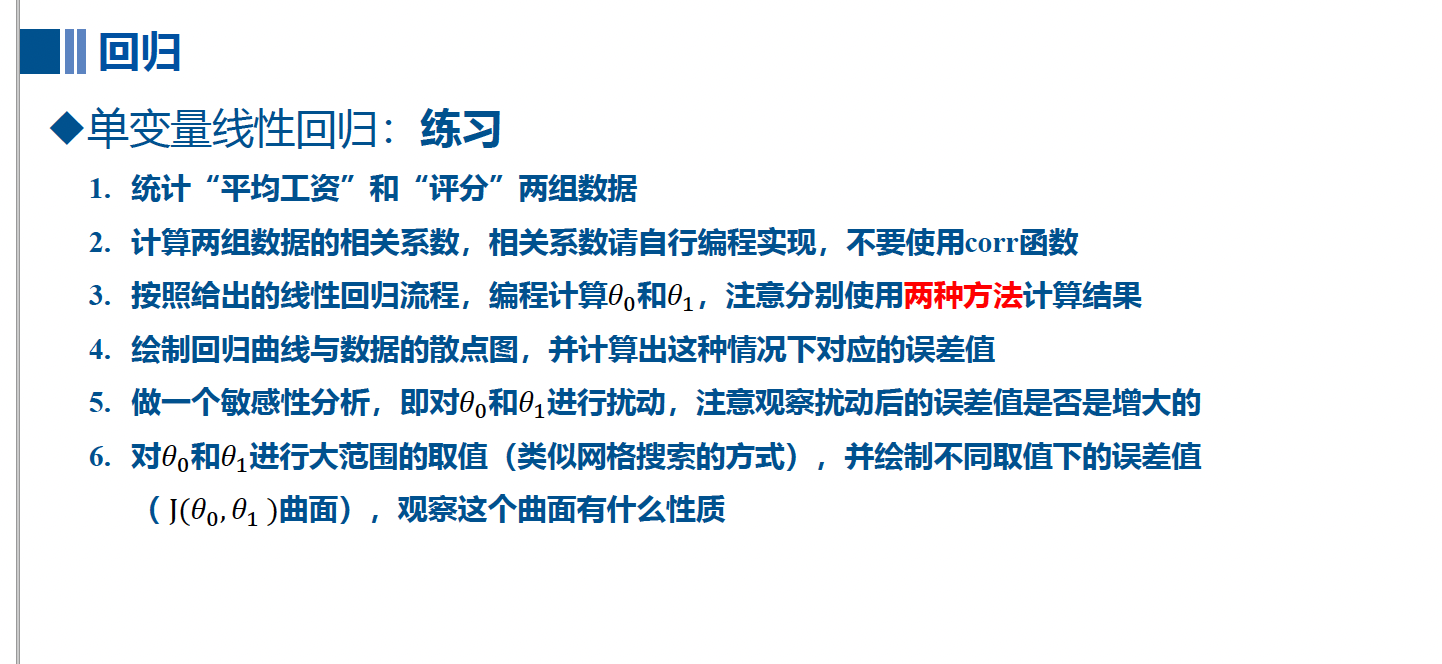

In [21]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5


# data_preparation
# 读取数据
userinfo = pd.read_csv("userinfo.csv")
overdue = pd.read_csv("overdue.csv")
bankinfo = pd.read_csv("bank.csv")

### 1. 统计平均工资和评分两组数据

In [22]:
# 计算平均工资
salary = bankinfo.loc[bankinfo['工资收入标记'] == 1, '交易金额']
average_salary = salary.groupby(bankinfo['new_user_id']).agg('mean').reset_index()
# 重命名列
average_salary.columns = ['new_user_id', '平均工资']
# 合并数据
data = pd.merge(userinfo, overdue[['new_user_id', '分数']], how='inner', on='new_user_id')
data = pd.merge(data, average_salary, how='inner', on='new_user_id')
# 描述统计平均工资和分数数据
print(f'平均工资和分数统计信息:\n{data[['平均工资', '分数']].describe()}')



平均工资和分数统计信息:
             平均工资          分数
count  556.000000  556.000000
mean    45.305749   81.656268
std      2.207655    3.673378
min     33.995400   67.179806
25%     44.508265   79.699282
50%     46.029993   82.019635
75%     46.712906   84.002173
max     51.522524   97.000000


### 2. 计算两组数据的相关系数


#### 2.1 编程实现，不使用corr函数

In [23]:
# salary_score_corr.py
import numpy as np
import pandas as pd


def pearson_corr_from_arrays(x, y):
    """
    计算两个向量的皮尔逊相关系数（不使用 pandas.DataFrame.corr）。

    参数:
      x, y - 1D 可迭代对象（会被转换为 numpy float 数组），会自动去除含 NaN 的对。
    返回:
      float - 皮尔逊相关系数；若样本数为0或分母为0则返回 np.nan
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    # 只保留同时非缺失的观测
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    n = x.size
    if n == 0:
        return np.nan

    xm = x.mean()
    ym = y.mean()
    x_dev = x - xm
    y_dev = y - ym

    num = np.sum(x_dev * y_dev)
    denom = np.sqrt(np.sum(x_dev ** 2) * np.sum(y_dev ** 2))

    if denom == 0:
        return np.nan

    return num / denom


def salary_score_correlation(bank_df,
                             overdue_df,
                             salary_col='交易金额',
                             salary_flag_col='工资收入标记',
                             user_id_col='new_user_id',
                             score_col='分数'):
    """
    计算平均工资与分数之间的皮尔逊相关系数（数学计算，不使用 .corr）。

    参数:
      bank_df: 包含交易的 DataFrame（必须含用户id、工资标记、交易金额列）
      overdue_df: 包含用户分数的 DataFrame（必须含用户id和分数字段）
      salary_col: bank_df 中表示金额的列名（默认 '交易金额'）
      salary_flag_col: 标记工资收入记录的列名（默认 '工资收入标记'）
      user_id_col: 用户 id 列名（默认 'new_user_id'）
      score_col: overdue_df 中的分数字段名（默认 '分数'）
    返回:
      (corr_value, merged_df) - 相关系数和用于计算的合并 DataFrame（包含 '平均工资' 和 score_col）
    """
    # 校验
    if bank_df is None or overdue_df is None:
        raise ValueError("bank_df 和 overdue_df 必须提供")

    # 如果提供的 score_col 不存在，尝试自动识别常见列名 '评分'
    if score_col not in overdue_df.columns and '评分' in overdue_df.columns:
        score_col = '评分'

    # 选出标记为工资的交易，并保留 id 和金额
    if user_id_col not in bank_df.columns or salary_col not in bank_df.columns or salary_flag_col not in bank_df.columns:
        raise KeyError("bank_df 中缺少必要列，请确认包含 user_id、salary_flag、salary_col 三列")

    salary_records = bank_df.loc[bank_df[salary_flag_col] == 1, [user_id_col, salary_col]].copy()

    # 强制金额为数值，无法转换的设为 NaN
    salary_records[salary_col] = pd.to_numeric(salary_records[salary_col], errors='coerce')

    if salary_records.empty:
        return np.nan, pd.DataFrame()

    # 按用户聚合求平均工资
    avg_salary = (salary_records
                  .groupby(user_id_col)[salary_col]
                  .mean()
                  .reset_index()
                  .rename(columns={salary_col: '平均工资'}))

    # 检查 overdue_df 必要列
    if user_id_col not in overdue_df.columns or score_col not in overdue_df.columns:
        raise KeyError(f"overdue_df 中必须包含列 {user_id_col} 和 {score_col}")

    # 将分数强制为数值（如果原来为中文 '评分' 或 '分数' 的字符串）
    overdue_copy = overdue_df[[user_id_col, score_col]].copy()
    overdue_copy[score_col] = pd.to_numeric(overdue_copy[score_col], errors='coerce')

    # 合并（inner 保证只保留两表都有的用户）
    merged = pd.merge(avg_salary, overdue_copy, how='inner', on=user_id_col)

    if merged.empty:
        return np.nan, merged

    # 计算相关系数
    corr_val = pearson_corr_from_arrays(merged['平均工资'].values, merged[score_col].values)

    return corr_val, merged

# 主函数
if __name__ == '__main__':
    # 示例：在当前目录下读取 bank.csv 和 overdue.csv 并计算相关系数
    try:
        bank_df = pd.read_csv('bank.csv')
    except Exception as e:
        print("读取 bank.csv 失败：", e)
        bank_df = None

    try:
        overdue_df = pd.read_csv('overdue.csv')
    except Exception as e:
        print("读取 overdue.csv 失败：", e)
        overdue_df = None

    if bank_df is not None and overdue_df is not None:
        try:
            corr_value, used_df = salary_score_correlation(bank_df, overdue_df, score_col='分数')
            print("计算结果：")
            print("样本数（用于计算平均工资和分数的用户数）:", len(used_df))
            print("Pearson 相关系数（平均工资 vs 分数）:", corr_value)
            print("\n前 5 行用于计算的数据预览：")
            print(used_df.head())
        except Exception as e:
            print("计算过程中出现错误：", e)
    else:
        print("请确保当前目录下存在 bank.csv 和 overdue.csv 并包含必要列。")

计算结果：
样本数（用于计算平均工资和分数的用户数）: 556
Pearson 相关系数（平均工资 vs 分数）: 0.13633187791178364

前 5 行用于计算的数据预览：
                        new_user_id       平均工资         分数
0  00375b8a7a62da4f578f4f4464fc4228  44.964550  81.809911
1  00872649357929f1f3d7fafbe484810b  46.415984  76.203618
2  00e44c200eeb161df7d08ac1b79bd4a7  47.292812  83.483392
3  02419b54629f540d3430e6ba8230aac4  45.600048  84.831173
4  024c12c231362aa4206c001674abe30f  40.380961  79.597737


#### 2.2 使用自带corr函数实现

In [24]:

corr_xy = data['平均工资'].corr(data['分数'])
print("平均工资与分数的皮尔逊相关系数：", corr_xy)

平均工资与分数的皮尔逊相关系数： 0.1363318779117837


### 3. 计算$\theta_0和\theta_1$

#### 3.1 解析方法

In [32]:

# 定义一个函数来实现单变量线性回归参数计算
def linear_regression(x, y):
    """
    用偏导方程求解单变量线性回归参数 w 和 b
    参数：
        x: 自变量列表/数组
        y: 因变量列表/数组
    返回：
        w: 斜率
        b: 截距
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    # 检查输入长度
    if len(x) != len(y):
        raise ValueError("x和y的长度必须相同")
    n = len(x)
    if n < 2:
        raise ValueError("样本量至少为2")
    
    # 计算x和y的平均值
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    # 计算分子：sum((x_i - mean_x) * (y_i - mean_y))
    numerator = 0.0
    # 计算分母：sum((x_i - mean_x)^2)
    denominator = 0.0
    
    for xi, yi in zip(x, y):
        diff_x = xi - mean_x
        diff_y = yi - mean_y
        numerator += diff_x * diff_y
        denominator += diff_x **2
    
    # 计算斜率w（避免分母为0）
    if denominator == 0:
        raise ValueError("x的所有值相同，无法计算斜率")
    w = numerator / denominator
    
    # 计算截距b
    b = mean_y - w * mean_x
    
    return w, b


# 示例使用
if __name__ == "__main__":
    # 输入数据（x为自变量，y为因变量）
    x = data['平均工资'].values
    y = data['分数'].values

    # 求解回归参数
    w, b = linear_regression(x, y)
    
    print(f"回归方程：y = {w:.4f}x + {b:.4f}")
    
    # 预测示例
    x_new = 6000
    y_pred = w * x_new + b
    print(f"当平均工资={x_new}时，预测评分（分数）值为：{y_pred:.4f}")

回归方程：y = 0.2268x + 71.3788
当平均工资=6000时，预测评分（分数）值为：1432.4569


#### 3.2 数值方法

In [36]:
import numpy as np

def grid_search_linear_regression(x, y, w_range=(-5, 5), b_range=(-5, 5), step=0.1):
    """
    用网格搜索方法求解单变量线性回归参数 w 和 b
    参数：
        x: 自变量（列表或数组）
        y: 因变量（列表或数组）
        w_range: w的搜索范围，格式为(最小值, 最大值)
        b_range: b的搜索范围，格式为(最小值, 最大值)
        step: 搜索步长（步长越小，精度越高，但计算量越大）
    返回：
        best_w: 最优斜率
        best_b: 最优截距
        best_mse: 最小均方误差
    """
    # 转换为numpy数组便于计算
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    # 检查输入长度
    if len(x) != len(y):
        raise ValueError("x和y的长度必须相同")
    n = len(x)
    if n < 2:
        raise ValueError("样本量至少为2")
    
    # 生成w和b的候选网格
    w_candidates = np.arange(w_range[0], w_range[1] + step, step)  # 包含上限
    b_candidates = np.arange(b_range[0], b_range[1] + step, step)
    
    # 初始化最优参数和最小MSE
    best_mse = float('inf')
    best_w = None
    best_b = None
    
    # 遍历所有参数组合
    for w in w_candidates:
        for b in b_candidates:
            # 计算预测值 y_pred = w*x + b
            y_pred = w * x + b
            # 计算均方误差（MSE）
            mse = np.mean((y - y_pred)** 2)
            # 更新最优参数
            if mse < best_mse:
                best_mse = mse
                best_w = w
                best_b = b
    
    return best_w, best_b, best_mse


# 示例使用
if __name__ == "__main__":
    # 样本数据
    x = data['平均工资'].values
    y = data['分数'].values

    # 网格搜索参数（可根据数据范围调整）
    w_range = (-2, 2)    # 斜率搜索范围
    b_range = (-100, 100)    # 截距搜索范围
    step = 0.1         # 步长（越小精度越高，计算越慢）
    
    # 执行网格搜索
    best_w, best_b, best_mse = grid_search_linear_regression(x, y, w_range, b_range, step)
    
    # 输出结果
    print(f"网格搜索最优参数：")
    print(f"斜率 w = {best_w:.4f}")
    print(f"截距 b = {best_b:.4f}")
    print(f"最小均方误差 MSE = {best_mse:.6f}")
    print(f"回归方程：y = {best_w:.4f}x + {best_b:.4f}")
    
    # 预测示例
    x_new = 6000
    y_pred = best_w * x_new + best_b
    print(f"\n当平均工资={x_new}时，预测分数为：{y_pred:.4f}")

网格搜索最优参数：
斜率 w = 0.2000
截距 b = 72.6000
最小均方误差 MSE = 13.222622
回归方程：y = 0.2000x + 72.6000

当平均工资=6000时，预测分数为：1272.6000


#### 3.3 绘制曲线

回归方程：y = 0.2268x + 71.3788


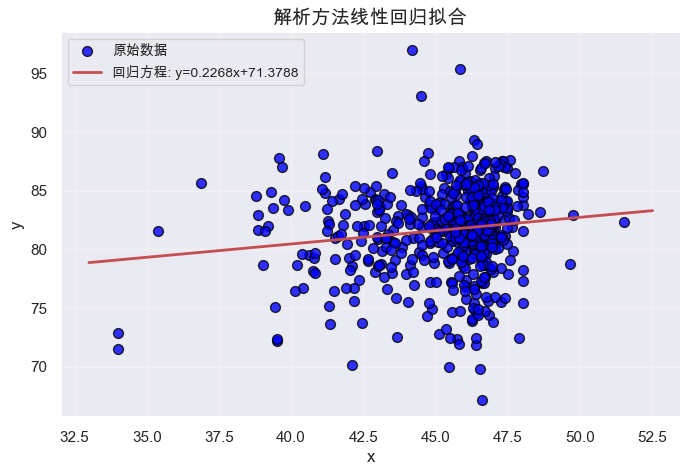

回归参数: w=0.2268, b=71.3788
均方误差(MSE): 13.219092
平均绝对误差(MAE): 2.731747
R²决定系数: 0.018586


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PyQt5
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 定义一个函数来实现单变量线性回归参数计算
def linear_regression(x, y):
    """
    用偏导方程求解单变量线性回归参数 w 和 b
    参数：
        x: 自变量列表/数组
        y: 因变量列表/数组
    返回：
        w: 斜率
        b: 截距
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    # 检查输入长度
    if len(x) != len(y):
        raise ValueError("x和y的长度必须相同")
    n = len(x)
    if n < 2:
        raise ValueError("样本量至少为2")
    
    # 计算x和y的平均值
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    # 计算分子：sum((x_i - mean_x) * (y_i - mean_y))
    numerator = 0.0
    # 计算分母：sum((x_i - mean_x)^2)
    denominator = 0.0
    
    for xi, yi in zip(x, y):
        diff_x = xi - mean_x
        diff_y = yi - mean_y
        numerator += diff_x * diff_y
        denominator += diff_x **2
    
    # 计算斜率w（避免分母为0）
    if denominator == 0:
        raise ValueError("x的所有值相同，无法计算斜率")
    w = numerator / denominator
    
    # 计算截距b
    b = mean_y - w * mean_x
    
    return w, b


# 主函数
if __name__ == "__main__":
    # 输入数据（x为自变量，y为因变量）
    x = data['平均工资'].values
    y = data['分数'].values

    # 求解回归参数
    w, b = linear_regression(x, y)
    
    print(f"回归方程：y = {w:.4f}x + {b:.4f}")
    y_pred = w * np.array(x) + b  # 预测值

    
# 绘图
# 绘图
plt.figure(figsize=(8, 5))
# 散点图
plt.scatter(x, y, color='blue', label='原始数据', alpha=0.8, s=50, edgecolors='black')
# 回归曲线（扩展x范围使曲线更完整）
x_line = np.linspace(min(x)-1, max(x)+1, 100)
plt.plot(x_line, w*x_line + b, 'r-', linewidth=2, label=f'回归方程: y={w:.4f}x+{b:.4f}')

# 图表设置
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('解析方法线性回归拟合', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# 计算并输出误差
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"回归参数: w={w:.4f}, b={b:.4f}")
print(f"均方误差(MSE): {mse:.6f}")
print(f"平均绝对误差(MAE): {mae:.6f}")
print(f"R²决定系数: {r2:.6f}")

#### 3.4 敏感性分析

最优参数：w=0.2268, b=71.3788
最优参数的MSE：13.219092


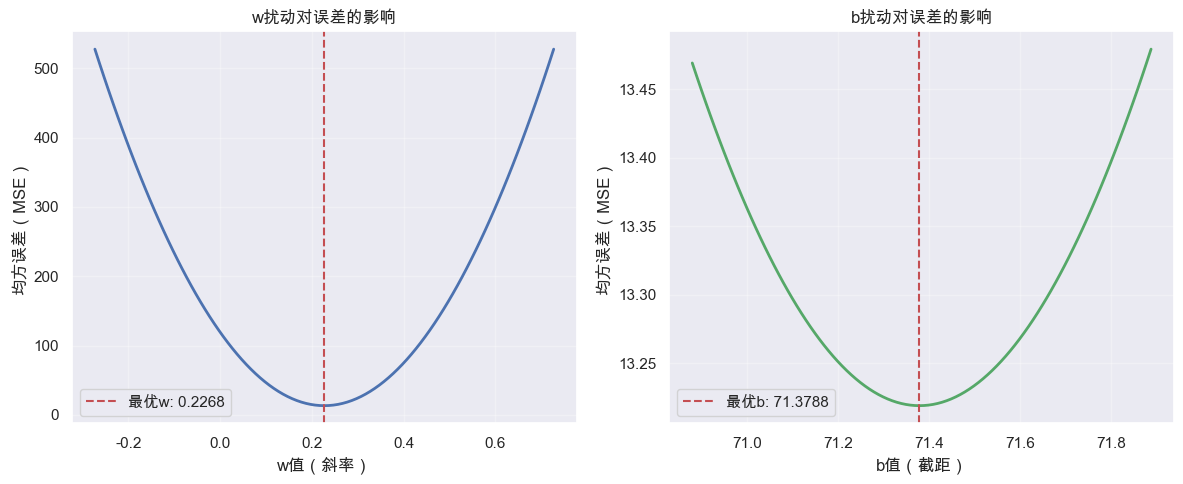


敏感性分析结论：
w扰动时，最小MSE=13.219092（等于最优MSE：False）
w扰动时，最大MSE=527.588058（大于最优MSE：True）
b扰动时，最小MSE=13.219092（等于最优MSE：True）
b扰动时，最大MSE=13.479192（大于最优MSE：True）


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. 解析方法求解最优回归参数
def analytical_linear_regression(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    if len(x) != len(y):
        raise ValueError("x和y长度必须相同")
    n = len(x)
    if n < 2:
        raise ValueError("样本量至少为2")
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) **2)
    if denominator == 0:
        raise ValueError("x值全相同，无法计算")
    
    w = numerator / denominator
    b = mean_y - w * mean_x
    return w, b

# 2. 敏感性分析：扰动w或b，计算误差变化
def sensitivity_analysis(x, y, w_opt, b_opt, perturb_range=0.5, step=0.01):
    """
    对w和b进行扰动，计算MSE变化
    参数：
        x, y: 原始数据
        w_opt, b_opt: 最优参数
        perturb_range: 扰动范围（相对于最优值的偏差范围）
        step: 扰动步长
    返回：
        扰动后的w、b及对应的MSE
    """
    x = np.array(x)
    y = np.array(y)
    
    # 生成w的扰动序列（在最优值附近波动）
    w_perturb = np.arange(w_opt - perturb_range, w_opt + perturb_range + step, step)
    # 生成b的扰动序列
    b_perturb = np.arange(b_opt - perturb_range, b_opt + perturb_range + step, step)
    
    # 计算仅扰动w时的MSE（固定b为最优值）
    mse_w = []
    for w in w_perturb:
        y_pred = w * x + b_opt
        mse_w.append(mean_squared_error(y, y_pred))
    
    # 计算仅扰动b时的MSE（固定w为最优值）
    mse_b = []
    for b in b_perturb:
        y_pred = w_opt * x + b
        mse_b.append(mean_squared_error(y, y_pred))
    
    return w_perturb, mse_w, b_perturb, mse_b

# 3. 可视化敏感性分析结果
def plot_sensitivity(w_perturb, mse_w, b_perturb, mse_b, w_opt, b_opt):
    # 创建2个子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 第1个子图：w扰动对MSE的影响
    ax1.plot(w_perturb, mse_w, 'b-', linewidth=2)
    ax1.axvline(x=w_opt, color='r', linestyle='--', label=f'最优w: {w_opt:.4f}')
    ax1.set_xlabel('w值（斜率）')
    ax1.set_ylabel('均方误差（MSE）')
    ax1.set_title('w扰动对误差的影响')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 第2个子图：b扰动对MSE的影响
    ax2.plot(b_perturb, mse_b, 'g-', linewidth=2)
    ax2.axvline(x=b_opt, color='r', linestyle='--', label=f'最优b: {b_opt:.4f}')
    ax2.set_xlabel('b值（截距）')
    ax2.set_ylabel('均方误差（MSE）')
    ax2.set_title('b扰动对误差的影响')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    # 输入数据（x为自变量，y为因变量）
    x = data['平均工资'].values
    y = data['分数'].values
    
    # 计算最优参数
    w_opt, b_opt = analytical_linear_regression(x, y)
    print(f"最优参数：w={w_opt:.4f}, b={b_opt:.4f}")
    
    # 计算最优参数对应的MSE
    y_opt_pred = w_opt * np.array(x) + b_opt
    mse_opt = mean_squared_error(y, y_opt_pred)
    print(f"最优参数的MSE：{mse_opt:.6f}")
    
    # 敏感性分析（扰动范围±0.5，步长0.01）
    w_perturb, mse_w, b_perturb, mse_b = sensitivity_analysis(x, y, w_opt, b_opt, perturb_range=0.5, step=0.01)
    
    # 可视化结果
    plot_sensitivity(w_perturb, mse_w, b_perturb, mse_b, w_opt, b_opt)
    
    # 验证：任意扰动后的MSE是否大于等于最优MSE
    max_mse_w = max(mse_w)
    min_mse_w = min(mse_w)
    max_mse_b = max(mse_b)
    min_mse_b = min(mse_b)
    
    print("\n敏感性分析结论：")
    print(f"w扰动时，最小MSE={min_mse_w:.6f}（等于最优MSE：{min_mse_w == mse_opt}）")
    print(f"w扰动时，最大MSE={max_mse_w:.6f}（大于最优MSE：{max_mse_w > mse_opt}）")
    print(f"b扰动时，最小MSE={min_mse_b:.6f}（等于最优MSE：{min_mse_b == mse_opt}）")
    print(f"b扰动时，最大MSE={max_mse_b:.6f}（大于最优MSE：{max_mse_b > mse_opt}）")

#### 3.5 大范围取值的曲面数据

最优参数：w=0.2268, b=71.3788
最优误差J(w, b)：13.219092


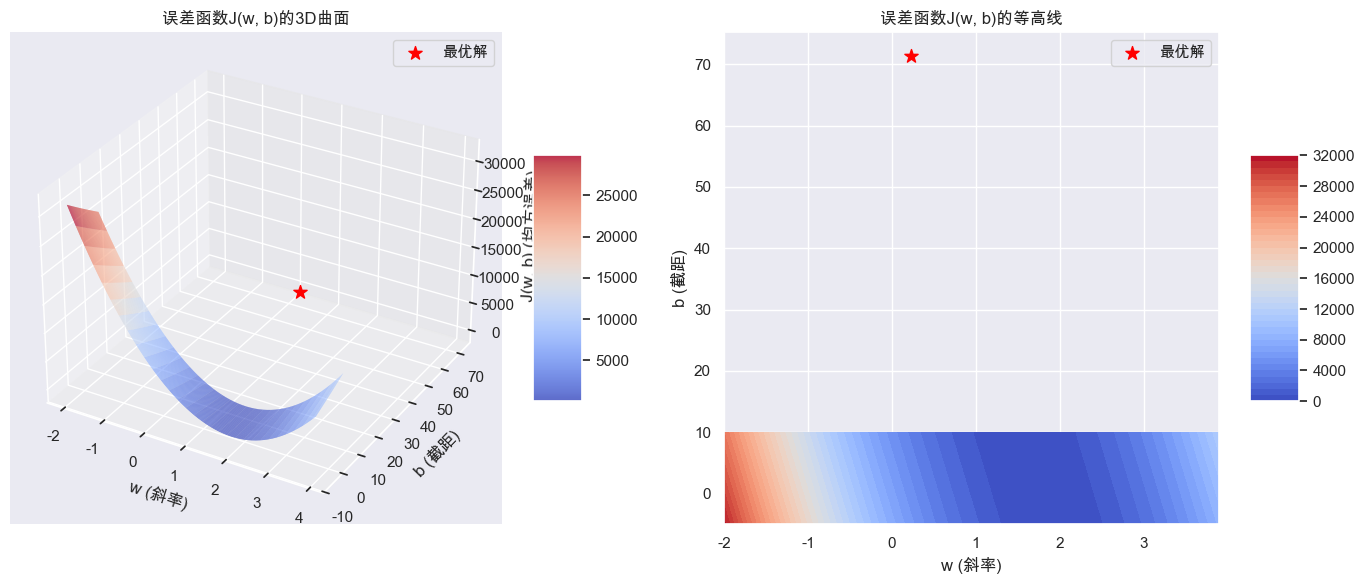

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 1. 解析方法求解最优参数（用于标记最小值点）
def analytical_linear_regression(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    mean_x, mean_y = np.mean(x), np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) **2)
    w = numerator / denominator
    b = mean_y - w * mean_x
    return w, b

# 2. 计算误差函数 J(w, b) = MSE
def compute_cost(x, y, w, b):
    """计算均方误差（MSE）作为损失函数"""
    y_pred = w * x + b
    mse = np.mean((y - y_pred)** 2)
    return mse

# 3. 生成w和b的网格并计算对应的误差
def generate_cost_surface(x, y, w_range, b_range, step=0.1):
    """
    生成w和b的网格，计算每个(w, b)对应的误差J(w, b)
    """
    x = np.array(x)
    y = np.array(y)
    
    # 生成w和b的取值网格
    w_vals = np.arange(w_range[0], w_range[1], step)
    b_vals = np.arange(b_range[0], b_range[1], step)
    W, B = np.meshgrid(w_vals, b_vals)  # 生成网格矩阵
    
    # 计算每个网格点的误差
    J_vals = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w = W[i, j]
            b = B[i, j]
            J_vals[i, j] = compute_cost(x, y, w, b)
    
    return W, B, J_vals

# 4. 绘制误差曲面
def plot_cost_surface(W, B, J_vals, w_opt, b_opt):
    """绘制J(w, b)的3D曲面和等高线图"""
    fig = plt.figure(figsize=(14, 6))
    
    # 3D曲面图
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(W, B, J_vals, cmap=cm.coolwarm, 
                           alpha=0.8, edgecolor='none')
    # 标记最优参数对应的最小值点
    ax1.scatter(w_opt, b_opt, compute_cost(x, y, w_opt, b_opt), 
               color='red', s=100, marker='*', label='最优解')
    ax1.set_xlabel('w (斜率)')
    ax1.set_ylabel('b (截距)')
    ax1.set_zlabel('J(w, b) (均方误差)')
    ax1.set_title('误差函数J(w, b)的3D曲面')
    ax1.legend()
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
    
    # 等高线图（俯视图）
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(W, B, J_vals, 50, cmap=cm.coolwarm)
    ax2.scatter(w_opt, b_opt, color='red', s=100, marker='*', label='最优解')
    ax2.set_xlabel('w (斜率)')
    ax2.set_ylabel('b (截距)')
    ax2.set_title('误差函数J(w, b)的等高线')
    ax2.legend()
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    # 输入数据（x为自变量，y为因变量）
    x = data['平均工资'].values
    y = data['分数'].values
    
    # 计算最优参数（用于标记最小值）
    w_opt, b_opt = analytical_linear_regression(x, y)
    print(f"最优参数：w={w_opt:.4f}, b={b_opt:.4f}")
    print(f"最优误差J(w, b)：{compute_cost(x, y, w_opt, b_opt):.6f}")
    
    # 定义w和b的大范围取值（根据数据调整）
    w_range = (-2, 4)    # w的搜索范围
    b_range = (-5, 10)   # b的搜索范围
    step = 0.1           # 步长（控制网格密度）
    
    # 生成误差曲面数据
    W, B, J_vals = generate_cost_surface(x, y, w_range, b_range, step)
    
    # 绘制误差曲面
    plot_cost_surface(W, B, J_vals, w_opt, b_opt)